## Strategic Thinking Project

Table of content

1. Introduction
2. Goal
3. Import  Datset & libraries
4. Overview
5. EDA
6. Data Pre-processing
7. Splitting
8. Modelling
9. Oversampling
10. Conclusions
11. References

Introduction

We are going to use the 'E Commerce Dataset' and 'E Comm details' Excel files to understand who leaves the company and we run a model to make a churn prediction 

Goal

We use the Churn feature as our target variable to study the comparasion between Churn and other features to get a good prediction to reduce the Churn for the company

Import  Datset & libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


Overview

The Dataset has 20 features and 5630 observations. 15 of these 20 columns are numerical and the other 5 are categorical

Variables Description

In [32]:
df_info = pd.read_excel('E Comm details.xlsx')
selected_columns = df_info[["Unnamed: 2", "Unnamed: 3"]]
selected_columns = selected_columns.rename(columns={"Unnamed: 2": "Column 1", "Unnamed: 3": "Column 2"})
df_info = selected_columns
df_info

,Column 1,Column 2
0,Variable,Discerption
1,CustomerID,Unique customer ID
2,Churn,Churn Flag
3,Tenure,Tenure of customer in organization
4,PreferredLoginDevice,Preferred login device of customer
5,CityTier,City tier
6,WarehouseToHome,Distance in between warehouse to home of customer
7,PreferredPaymentMode,Preferred payment method of customer
8,Gender,Gender of customer
9,HourSpendOnApp,Number of hours spend on mobile application or...


In [33]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [34]:
df.shape

(5630, 20)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Churn Distribution : target Variable. 0 as no Churn, 1 as Churn

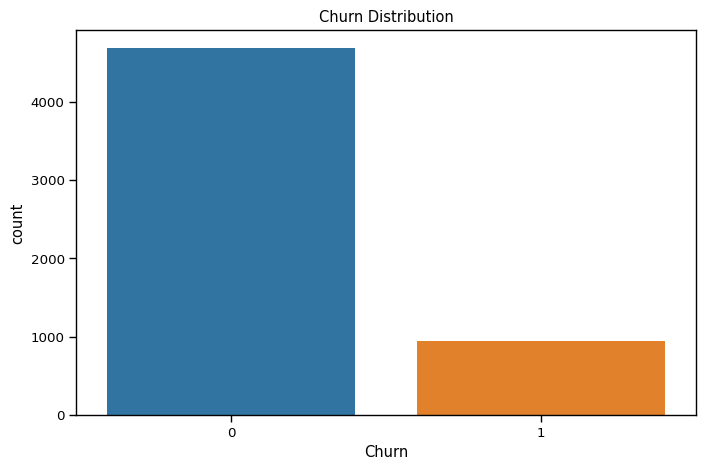

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [38]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.14, y=0.4, font_size=18, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.4, font_size=18, showarrow=False)])
fig.show()

Churn by Preferred Payment Mode

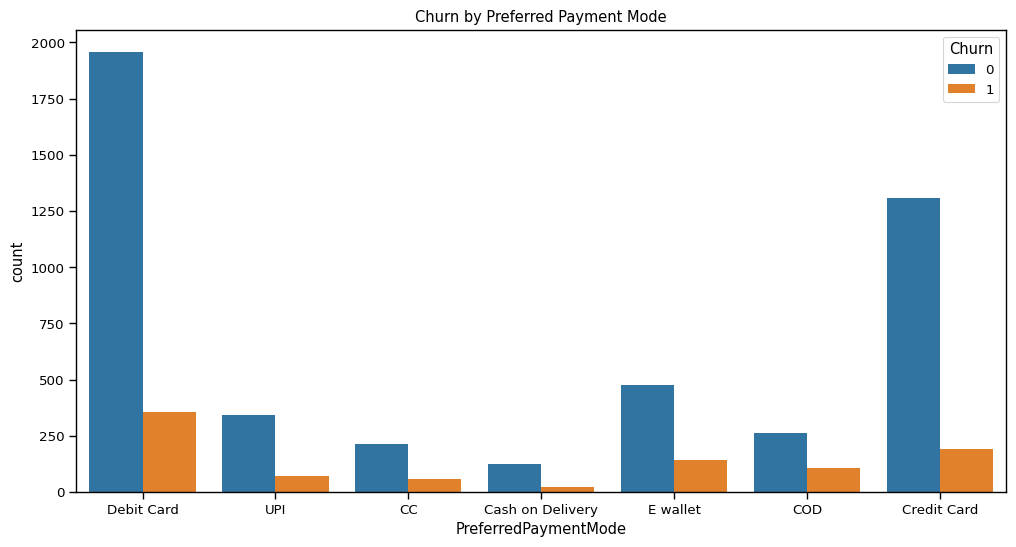

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df)
plt.title('Churn by Preferred Payment Mode')
plt.show()

Churn by Preferred Login Device

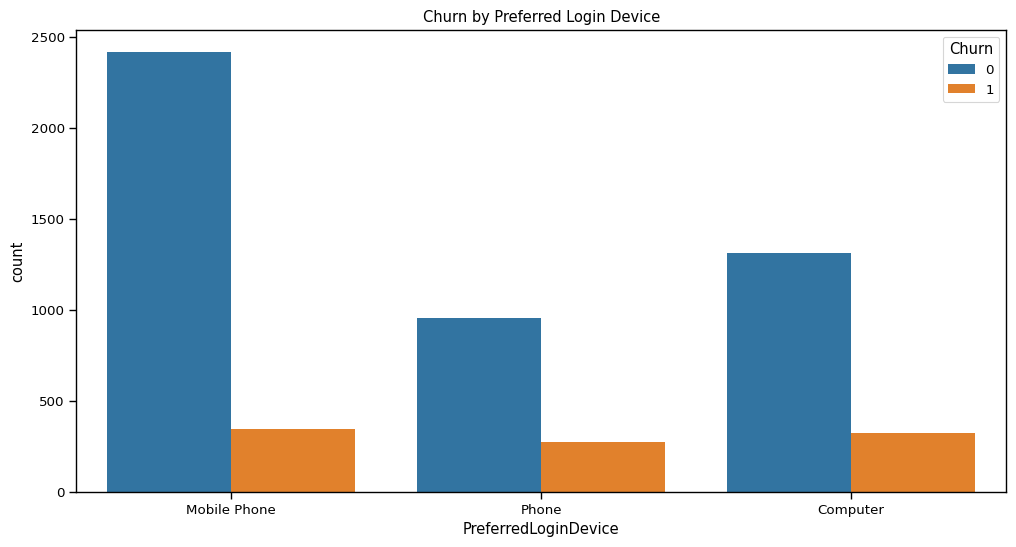

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Churn by Preferred Login Device')
plt.show()

Churn by HourSpendOnApp and SatisfactionScore

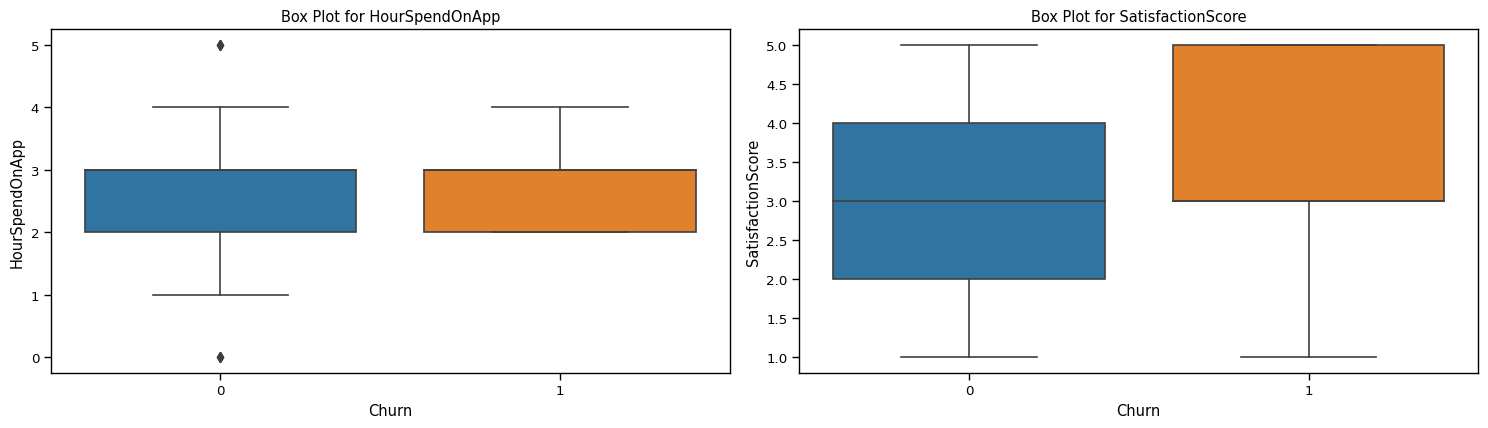

In [41]:
features_for_box_plot = ['HourSpendOnApp', 'SatisfactionScore', 'Churn']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_for_box_plot[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Box Plot for {feature}')

plt.tight_layout()
plt.show()

In [42]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("ecommerce.html")

EDA

We proceed to follow the variables description we did in the first step and analyse, handling missing values first, and pre-processing them one by one if necessary later.

"Tenure" has 9% of zeros due to the longevity in the company and it has 4.7% of missing values which we proceed to handle with the mean to maintain the overall distribution of this feature

In [43]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())

As we saw in Overview, Preferred login device has 'mobile phone' and 'phone' which we assume are both same

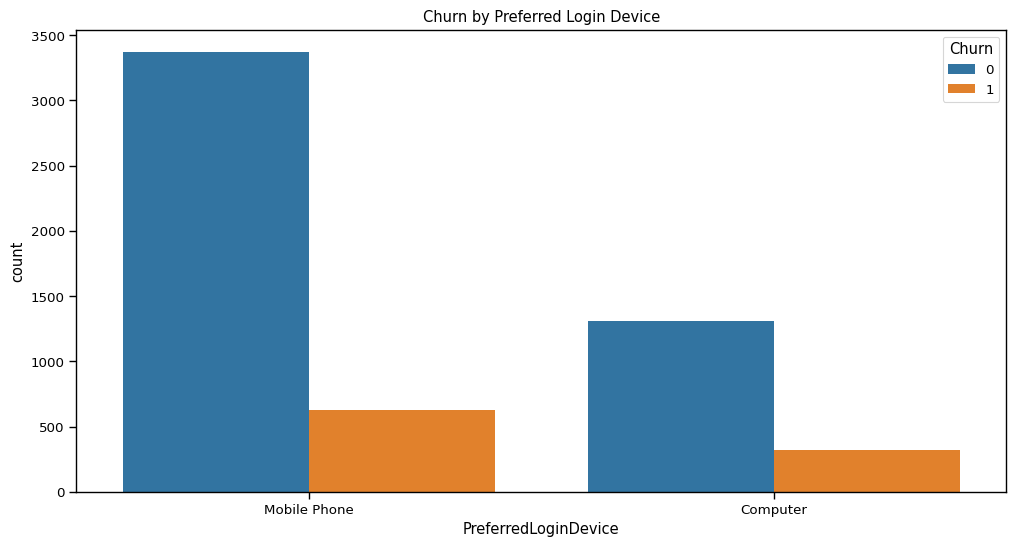

In [44]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

plt.figure(figsize=(12, 6))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Churn by Preferred Login Device')
plt.show()

Let's replace the missing values of 'WarehouseToHome' with the median

In [45]:
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

Is there any realtionship between Churn and Gender?

In [46]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [47]:
gender_churn_counts = df.groupby(['Gender', 'Churn']).size().unstack()
gender_churn_counts['Total'] = gender_churn_counts.sum(axis=1)
gender_churn_counts['Churn Percentage'] = (gender_churn_counts[1] / gender_churn_counts['Total']) * 100

print(gender_churn_counts)

Churn      0    1  Total  Churn Percentage
Gender                                    
Female  1898  348   2246         15.494212
Male    2784  600   3384         17.730496


Since the percentage of churn in male customers is slightly higher than that of female customers, we can assume that we should focus more on addressing the needs of male customers to positively affect our target variable and keep working on Female Gender to increse the Total number of customers

what about HourSpendOnApp comparing that with Gender?

HourSpendOnApp has a tendency as three hours as the html report shows. First at all we decide to handle the 4.5% of missing values with a mean and keep save the same frequency. Then we focus on a relationship between HourSpendOnApp with Gender

In [48]:
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)

We perform the independent t-test to determine if there is a significant difference between the mean of HourSpendOnApp in Male & HourSpendOnApp in Female

In [85]:
from scipy.stats import ttest_ind

In [86]:
male_data = df[df['Gender'] == 'Male']['HourSpendOnApp']
female_data = df[df['Gender'] == 'Female']['HourSpendOnApp']


mean_male = male_data.mean()
mean_female = female_data.mean()


t_statistic, p_value = ttest_ind(male_data, female_data, equal_var=False)

print(f'Mean HourSpendOnApp (Male): {mean_male}')
print(f'Mean HourSpendOnApp (Female): {mean_female}')
print(f'T-test p-value: {p_value}')

Mean HourSpendOnApp (Male): nan
Mean HourSpendOnApp (Female): nan
T-test p-value: nan


There is no strong statistical evidence to suggest that the average "HourSpendOnApp" is significantly different between male and female customers. The p-value of 0.17027252509743426 is greater than the conventional threshold of 0.05, indicating that any observed differences in means could be due to random variation.

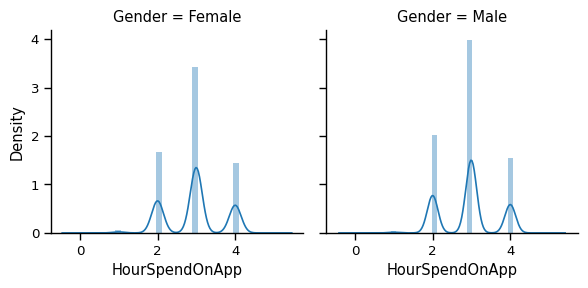

In [50]:
import warnings
warnings.filterwarnings("ignore")

facegrid = sns.FacetGrid(df, col='Gender')
facegrid.map(sns.distplot, 'HourSpendOnApp')

Let's keep going analysing the missing values of our dataset. We decide to apply the mean to the last four variables which have missing values too and they are: 
OrderAmountHikeFromlastYear has 265 (4.7%),
CouponUsed has 256 (4.5%),
OrderCount has 258 (4.6%),
DaySinceLastOrder has 307 (5.5%)

In [51]:
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].mean(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].mean(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean(), inplace=True)

In [52]:
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("Missing Values:")


No missing values in the DataFrame.


Now we don't have any missing values and we can focus on City Tier variable and comparing it with other features. Which CityTier has the highest OrderCount?

In [53]:
#pip install -r requirements.txt

In [54]:
df['OrderCount'] = df['OrderCount'].astype(int)
df.groupby('CityTier')[['OrderCount']].sum()

,OrderCount
CityTier,
1,10835
2,627
3,5471


The City Tier with the highest OrderCount is 1 with 	10835 orders

In [84]:
fig = px.box(df, x='Churn', y = 'Tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

The median tenure for churned customers is significantly lower (1) than non-churned customers (10). It suggests that customers with lower tenure are more likely to churn.

Data Pre-processing

Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
df['CouponUsed'] = df['CouponUsed'].astype(int)
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].astype(int)
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int32
CouponUsed                       int32
OrderCount                       int32
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [58]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice             int32
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int32
Gender                           int32
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int32
SatisfactionScore                int64
MaritalStatus                    int32
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int32
CouponUsed                       int32
OrderCount                       int32
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [59]:
correlation_matrix = df.corr()
print(correlation_matrix['Churn'].sort_values(ascending=False))

Churn                          1.000000
Complain                       0.250188
MaritalStatus                  0.140316
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
PreferedOrderCat               0.104569
CityTier                       0.084703
WarehouseToHome                0.069544
NumberOfAddress                0.043931
Gender                         0.029264
HourSpendOnApp                 0.018126
CouponUsed                    -0.001430
OrderAmountHikeFromlastYear   -0.007075
CustomerID                    -0.019083
PreferredPaymentMode          -0.026519
OrderCount                    -0.028308
PreferredLoginDevice          -0.051099
CashbackAmount                -0.154118
DaySinceLastOrder             -0.156152
Tenure                        -0.335513
Name: Churn, dtype: float64


<Axes: >

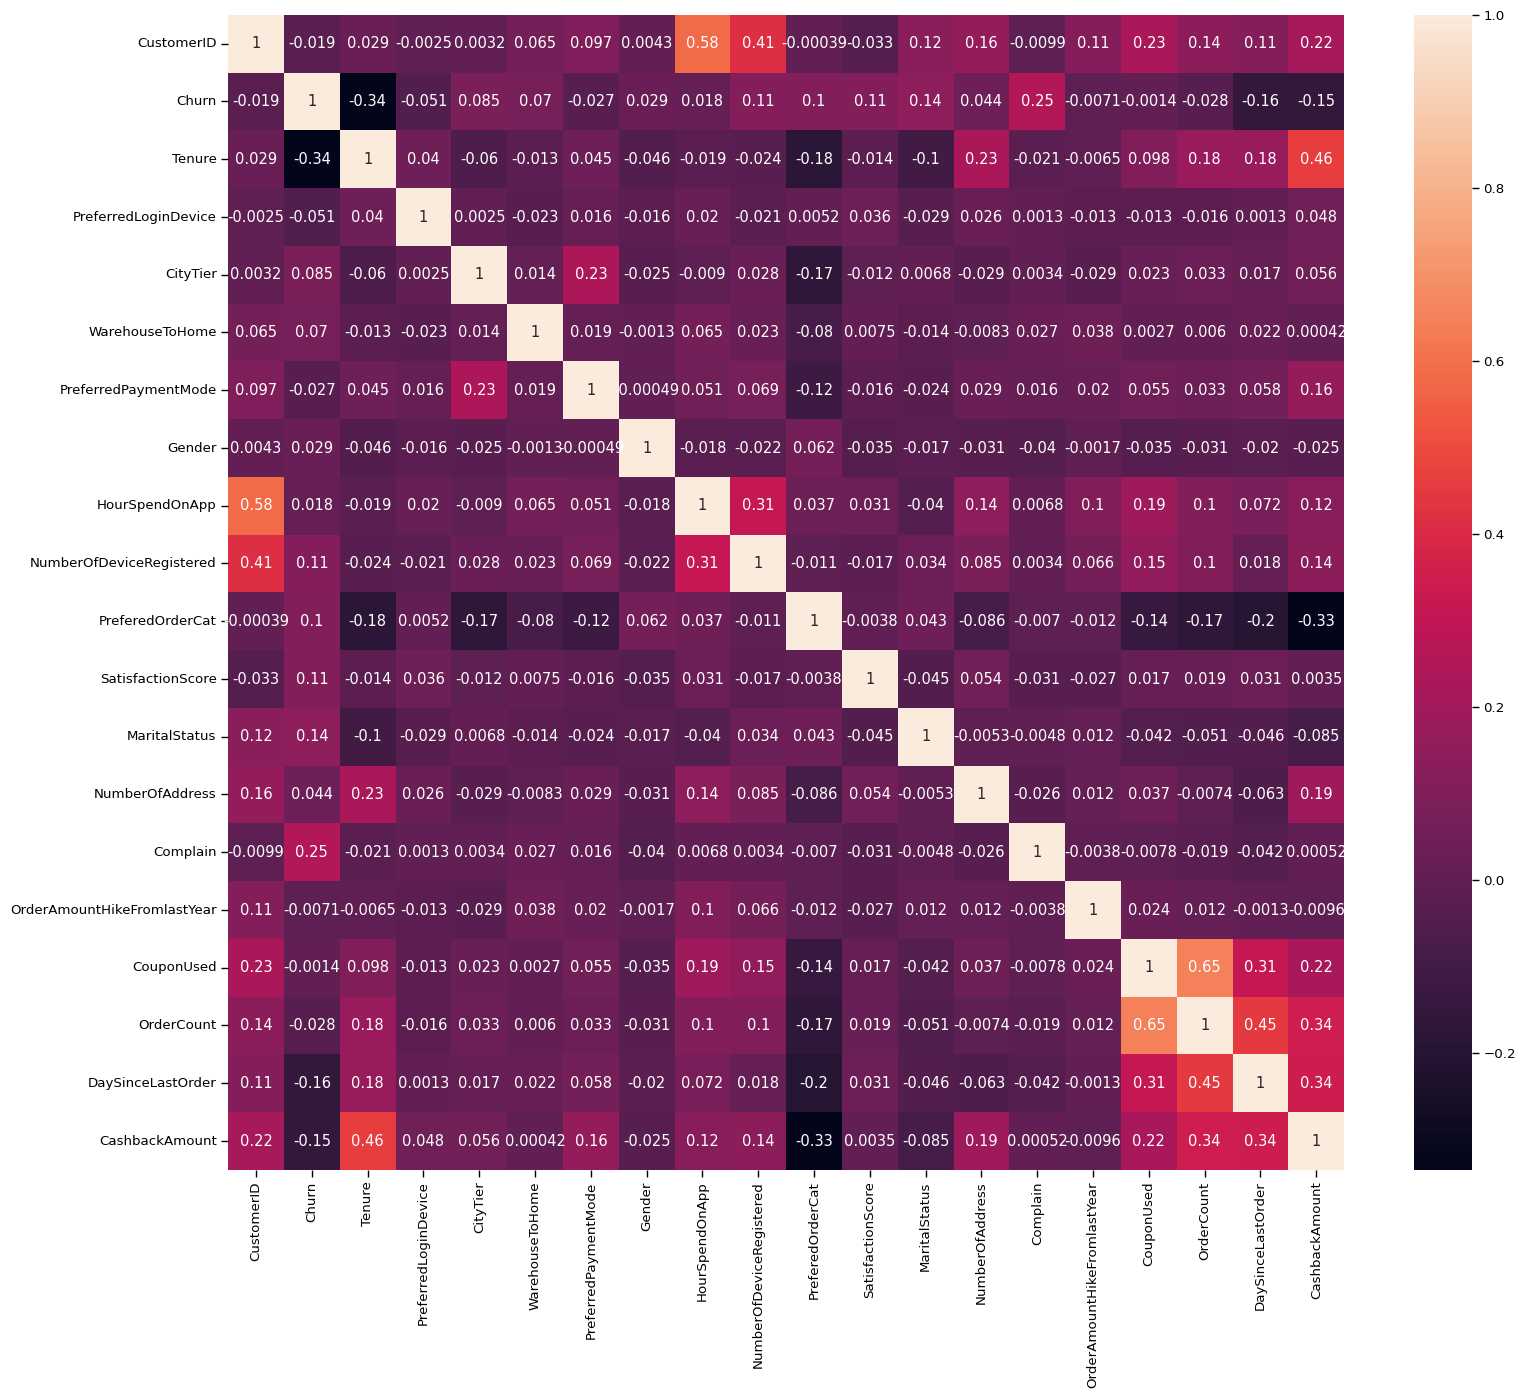

In [60]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True)

In [61]:
churn_corr_vector = correlation_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.250188
MaritalStatus                  0.140316
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
PreferedOrderCat               0.104569
CityTier                       0.084703
WarehouseToHome                0.069544
NumberOfAddress                0.043931
Gender                         0.029264
HourSpendOnApp                 0.018126
CouponUsed                    -0.001430
OrderAmountHikeFromlastYear   -0.007075
CustomerID                    -0.019083
PreferredPaymentMode          -0.026519
OrderCount                    -0.028308
PreferredLoginDevice          -0.051099
CashbackAmount                -0.154118
DaySinceLastOrder             -0.156152
Tenure                        -0.335513
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

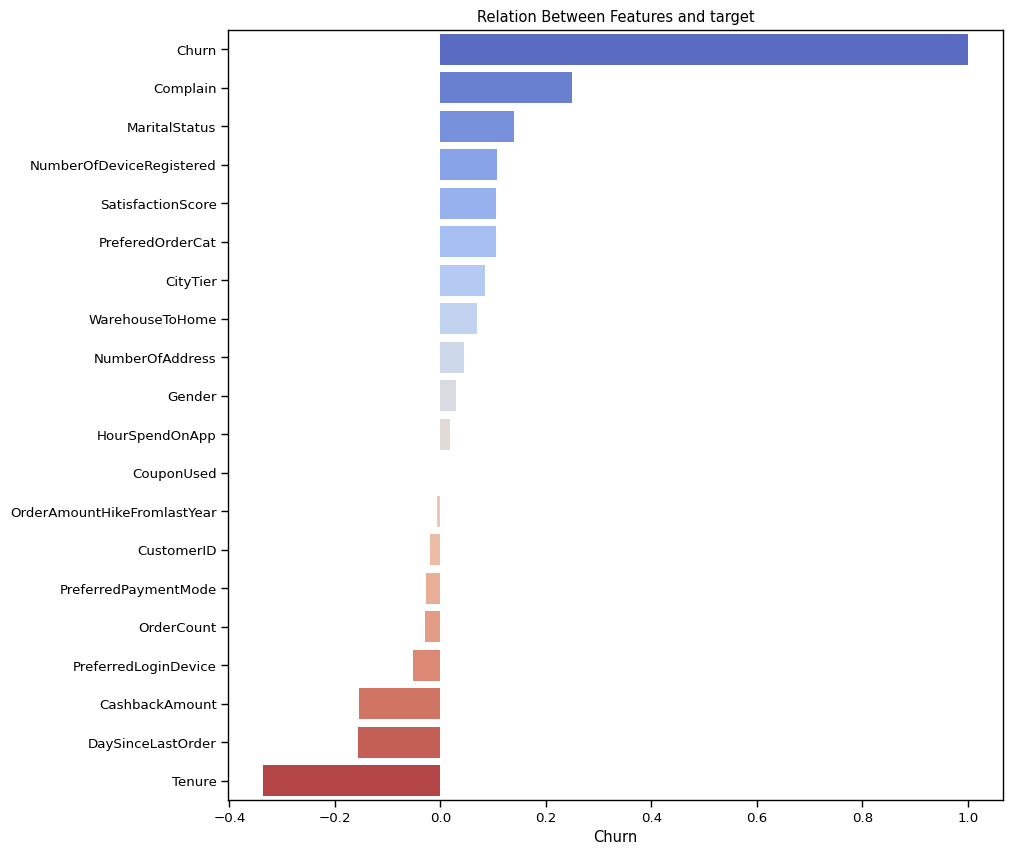

In [62]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

Hyperparameter Tuning and Cross-Validation

These steps involve optimizing the performance of our model and assessing its generalization ability using techniques like GridSearchCV or RandomizedSearchCV and k-fold cross-validation. We ensure that the optimization process is based on the original distribution of the data, so we tune the hyperparameters and evaluating the model's performance before the oversampling we do at the end.

Modelling

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

splitting 10% of testing

In [66]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8525754884547069
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       468
           1       0.69      0.23      0.35        95

    accuracy                           0.85       563
   macro avg       0.78      0.61      0.63       563
weighted avg       0.83      0.85      0.82       563



In [68]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9786856127886323
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       468
           1       1.00      0.87      0.93        95

    accuracy                           0.98       563
   macro avg       0.99      0.94      0.96       563
weighted avg       0.98      0.98      0.98       563



In [69]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)

Logistic Regression Accuracy: 0.8525754884547069
Random Forest Accuracy: 0.9786856127886323


Based on the provided classification reports, it seems that the Random Forest model performs better than the Logistic Regression model, especially when considering metrics like precision, recall, and F1-score for the positive class (Churn = 1). In general, the RF model seems to have higher precision, recall, and F1-score for the positive class (Churn = 1), indicating better performance in identifying customers who are likely to churn.

Comparing and evaluating the best model

It is an important step we decided to do only at the end because we wanted to explore and understand the natural distribution of our data. We Trained initial LR & RF models without balancing to gauge their performance and how well our model was handling the imbalanced classes and then, comparing it once we balanced our target variable.

Oversampling the Minority Class

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [72]:
logreg = LogisticRegression()
logreg.fit(X_resampled_scaled, y_resampled)

y_pred_logreg = logreg.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report - Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7513321492007105
Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83       468
           1       0.38      0.78      0.51        95

    accuracy                           0.75       563
   macro avg       0.66      0.76      0.67       563
weighted avg       0.85      0.75      0.78       563



In [73]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled_scaled, y_resampled)

y_pred_rf = rf_classifier.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.9769094138543517
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       468
           1       0.93      0.94      0.93        95

    accuracy                           0.98       563
   macro avg       0.96      0.96      0.96       563
weighted avg       0.98      0.98      0.98       563



In [74]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)

Logistic Regression Accuracy: 0.7513321492007105
Random Forest Accuracy: 0.9769094138543517


Random Forest maintains high accuracy even with a balanced target variable

Third CA

1.	Hyperparameter Tuning and Cross-Validation:
•	Implement techniques like GridSearchCV or RandomizedSearchCV for hyperparameter tuning, ensuring to specify appropriate hyperparameter grids or distributions for each model.
•	Use cross-validation techniques like k-fold cross-validation or time series cross-validation (if dealing with time series data) to assess model performance and generalization.
2.	Model Evaluation Metrics:
•	Calculate comprehensive evaluation metrics including ROC-AUC, PR-AUC, confusion matrices, and other relevant metrics to provide a thorough assessment of model performance.
•	Compare the performance of different models using these metrics and select the best-performing model for further analysis.
3.	Feature Importance Analysis:
•	Analyze feature importance using techniques like RandomForest's feature_importances_ attribute or SHAP values to identify the most influential features in predicting churn.
•	Visualize feature importance using bar plots or other relevant visualizations to communicate the importance of each feature effectively.
4.	Documentation and References:
•	Ensure that your analysis is well-documented with clear explanations of each step, including comments in the code to explain complex sections or methodologies.
•	Properly reference all sources used in your project, including techniques, algorithms, libraries, and any other external resources referenced in your analysis.


References


https://seaborn.pydata.org/generated/seaborn.violinplot.html


https://www.tutorialspoint.com/python_data_science/python_p_value.htm


Brownlee, J. (2020). Imbalanced Classification with Python. Machine Learning Mastery


Müller, A.C. and Guido, S. (2018) Introduction to machine learning with python: A guide for data scientists. Sebastopol: O’Reilly Media


McKinney, W. (2022) Python for Data Analysis: Data wrangling with pandas, NumPy, and Jupyter. Beijing: O’Reilly


iguazio.com (2014). What is Model Accuracy in Machine Learning. [online] Iguazio. Available at: https://www.iguazio.com/glossary/model-accuracy-in-ml/ 


https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction

